In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

DB_PATH = '../database/fair_sampling.db'

In [33]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT COUNT(*) as num_instances, AVG(od_variance), AVG(od_mean), AVG(post_anneal_od_variance), AVG(post_anneal_od_mean) FROM instances_N12
WHERE post_anneal_od_variance IS NOT NULL AND post_anneal_supp_ratio > 0.9 and degeneracy >= 6;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [34]:
df

,num_instances,AVG(od_variance),AVG(od_mean),AVG(post_anneal_od_variance),AVG(post_anneal_od_mean)
0,55,0.141767,0.523916,0.034404,0.789272


In [11]:
print(df["od_variance"].mean())
print(df["post_anneal_od_variance"].mean())

0.02887984435797666
0.04358470817120623


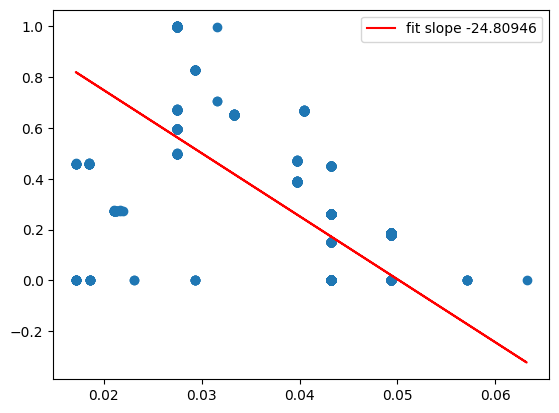

In [18]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT seed, od_variance, post_anneal_supp_ratio FROM instances_N8
WHERE degeneracy > 2

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

plt.scatter(df["od_variance"], df["post_anneal_supp_ratio"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["od_variance"], df["post_anneal_supp_ratio"], 1)

# Calculate the predicted values
fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.legend()

plt.show()

In [ ]:
"""
Notes

What is happening when h is too low and the ground state probabilities go haywire?
How do we determine the appropriate h for each instance programmatically?

Once we have the appropriate h, how do we consider softly suppressed ground states in our analysis?

"""